# Graficas de Frontera de Decisión

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

## Loading the data

In [2]:
df=pd.read_csv("../data\iris_dataset.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing the data

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [4]:
df['class']=le.transform(df['Class'].values)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['PetalLength','PetalWidth']], df['class'], test_size=0.3, random_state= 2019)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [9]:
print(X_combined_std)

[[ 0.71655211  0.46296805]
 [-1.27537603 -1.36159772]
 [ 1.7409723   1.37525093]
 [-1.44611273 -1.36159772]
 [-1.3892005  -1.36159772]
 [ 0.71655211  0.7236203 ]
 [-1.3892005  -1.36159772]
 [ 1.05802551  1.37525093]
 [ 0.26125425  0.07198967]
 [ 0.20434202 -0.05833646]
 [-1.2184638  -1.10094547]
 [ 0.43199095  0.07198967]
 [ 0.09051755 -0.05833646]
 [-1.33228827 -1.36159772]
 [-0.19404361 -0.31898871]
 [ 1.28567444  0.85394643]
 [ 0.94420104  0.7236203 ]
 [-1.27537603 -1.36159772]
 [ 0.37507871  0.46296805]
 [-1.2184638  -0.97061934]
 [-1.27537603 -0.84029322]
 [ 0.71655211  1.37525093]
 [-1.33228827 -1.10094547]
 [-1.3892005  -1.36159772]
 [ 0.09051755 -0.31898871]
 [ 0.54581541  0.7236203 ]
 [-1.33228827 -1.49192385]
 [ 1.28567444  1.37525093]
 [ 0.48890318  0.33264192]
 [ 0.03360532 -0.18866258]
 [ 0.65963988  0.98427255]
 [ 0.14742978  0.07198967]
 [ 0.48890318 -0.05833646]
 [-0.47860478 -0.18866258]
 [ 0.60272765  0.7236203 ]
 [ 0.94420104  1.11459868]
 [ 1.17184997  1.37525093]
 

In [10]:
print(y_combined)

[1 0 2 0 0 2 0 2 1 1 0 1 1 0 1 2 2 0 1 0 0 2 0 0 1 1 0 2 1 1 2 1 1 1 2 2 2
 2 1 1 2 1 2 2 0 0 1 2 2 2 2 0 2 2 2 2 1 2 1 0 1 0 0 0 0 0 1 1 0 1 2 1 2 2
 1 2 2 1 2 0 1 1 0 2 0 2 1 1 2 0 0 2 2 1 0 2 0 2 2 0 0 0 0 2 1 1 0 0 2 2 1
 2 1 2 2 0 0 2 1 0 2 2 1 1 1 0 2 0 1 0 0 1 0 1 0 1 0 0 0 2 0 1 2 0 1 1 1 0
 1 1]


## Creating cmap colors tuple

In [11]:
colors = ('red','purple','yellow','green')
cmap = ListedColormap(colors[:len(np.unique(y_combined))])
cmap.colors

('red', 'purple', 'yellow')

## Creating a function for plotting

In [17]:
def plot_regions(X, y, classifier):
    markers = ('x','>','*')
    colors = ('red','purple','yellow','green')
    res = 0.02
    
    #Plot regions
    x1min, x1max = X[:,0].min() -1, X[:,0].max() + 1
    x2min, x2max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

    output = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    
    plt.figure(figsize=(8,8))
    #plt.pcolormesh(xx1,xx2, output, alpha=0.8, cmap=plt.cm.cool)
    plt.contourf(xx1, xx2, output, alpha=0.8, cmap=plt.cm.cool)
    
    #PLOT ALL SAMPLES
    for index, item in enumerate(np.unique(y)):
        plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, facecolor='k',
        marker=markers[index], label=item)

    plt.xlabel('petal length std')
    plt.ylabel('petal width std')

    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    plt.legend(loc='best',bbox_to_anchor=(0.5, 1.05), ncol=3,fancybox=True, shadow=True)

## Plotting Logistic Regression Regions:

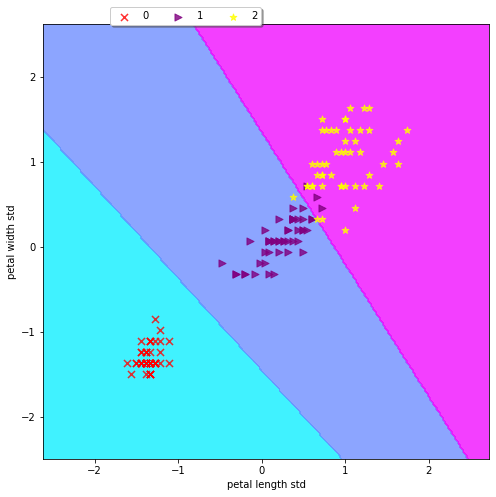

In [18]:
#Llamada a la funcion
lr = LogisticRegression(C=1000.0,solver='lbfgs', multi_class='auto')
lr.fit(X_train_std, y_train)
plot_regions(X=X_combined_std,y=y_combined,classifier=lr)